# GBTDS: Globular Clusters and Observational Strategy

In [ ]:
## Import requisite python pacakages 
import sys
import os
import pandas as pd
#import pint # pandas utility to add units
#pd.set_option("display.max.columns", None)
import numpy as np
from itertools import groupby

In [30]:
## Import plotting/visualziation tools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm
%matplotlib inline  
import plotly.graph_objects as go
import plotly.express as px

In [233]:
## Import astropy coordinate/unit packages
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import astropy.units as u

### Read JS globular cluster compilation

In [235]:
# References include Bica2024, Garro2024, Belorukov(2024), Perez-Villegas(2020), and references therein 
ig_clusters = pd.read_csv('Inner_Galaxy_GC_Compilation.csv')
ig_clusters.style.format(precision=2).hide()

Cluster_Name,RA_deg,DEC_deg,Gal_l_deg,Gal_b_deg,D_sun_kpc,D_sun_err_kpc,Fe_H,Fe_H_err,M_V,Reference
BH_261,273.52,-28.63,3.36,-5.27,6.50,0.65,-1.09,0.05,-4.06,Bica2024
Camargo_1102,260.44,-26.54,359.14,5.73,8.20,1.20,-1.70,0.20,-6.30,Bica2024
Camargo_1103,271.63,-25.16,5.60,-2.12,5.00,0.80,-1.80,0.30,-6.90,Bica2024
Camargo_1104,271.31,-24.98,5.62,-1.78,5.40,1.00,-1.80,0.30,-5.70,Bica2024
Camargo_1107,264.24,-30.15,357.98,0.96,4.00,0.70,-2.20,0.40,-6.60,Bica2024
Camargo_1108,266.52,-30.86,358.40,-1.09,3.30,0.50,-1.80,0.30,-8.40,Bica2024
Camargo_1109,266.86,-26.65,2.17,0.84,4.30,0.60,-1.50,0.20,-6.40,Bica2024
Djorg_1,266.86,-33.06,356.67,-2.48,9.30,0.50,-1.54,0.13,-6.98,Bica2024
ESO393-12,264.66,-35.65,353.51,-2.28,8.20,0.40,-0.60,0.20,-5.30,Bica2024
ESO452-SC11,249.85,-28.39,351.91,12.10,6.50,0.65,-0.81,0.13,-4.02,Bica2024


### Perform coordinate transformation

In [220]:
gal = SkyCoord(ig_clusters.Gal_l_deg, ig_clusters.Gal_b_deg, frame='galactic', unit=u.deg)

### Generate Matplotlib Visualizations

#### General Aitoff Projection

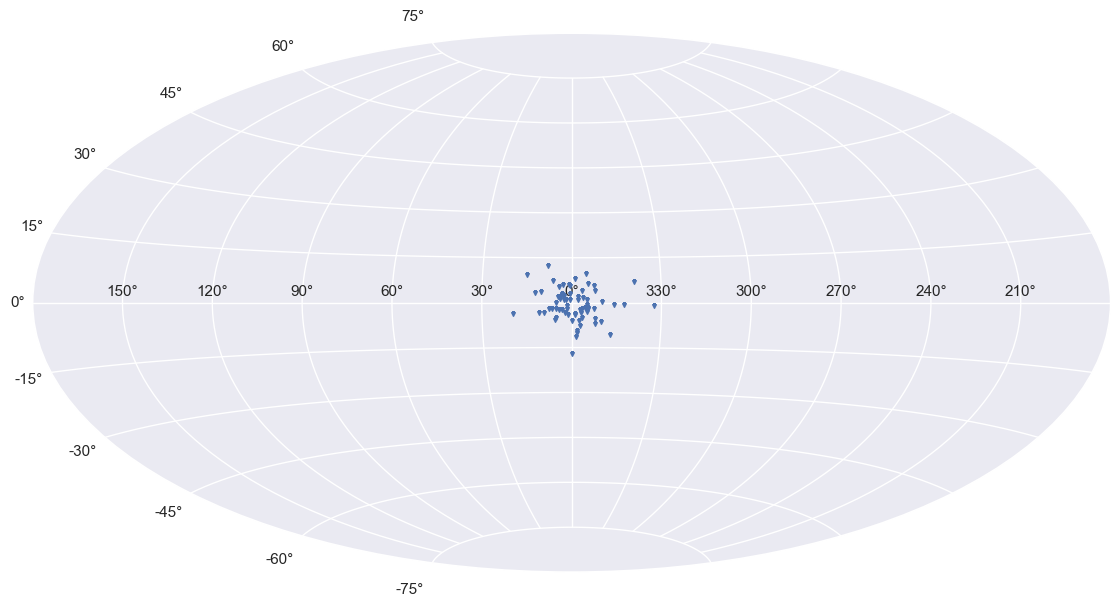

In [221]:
sns.set()
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian, marker='v', s=7)
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]),
           labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.show()

#### Globular Clusters in the Inner Galaxy

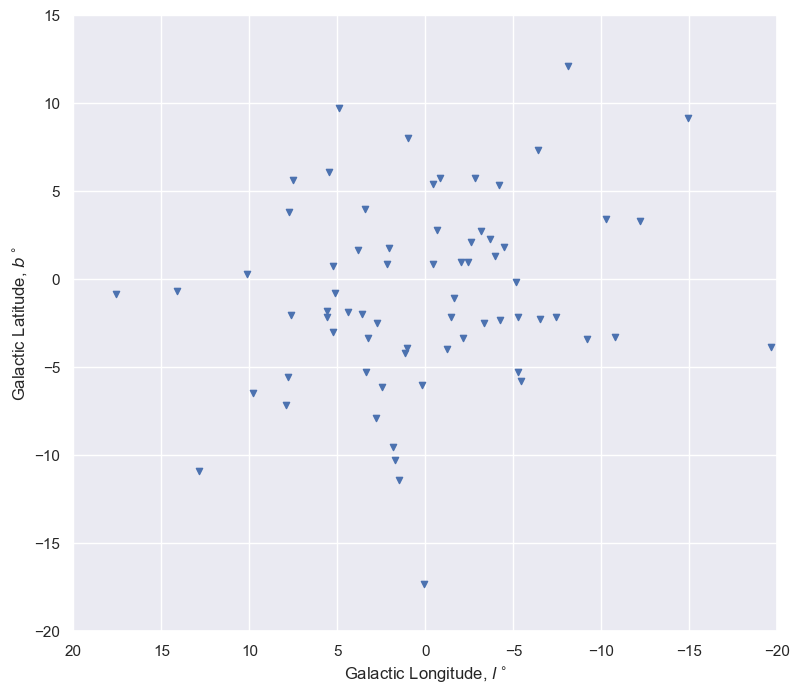

In [222]:
sns.set()
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(1,1,1, aspect='equal')
ax.scatter(gal.l.wrap_at('180d'), gal.b, marker='v', s=20)
ax.set_xlim(20., -20.)
ax.set_ylim(-20., 15.)
plt.xlabel(r'Galactic Longitude, $l^\circ$')
plt.ylabel(r'Galactic Latitude, $b^\circ$')
plt.show()

#### Bulge Region Overlay: Nominal GBTDS 7-field Design 

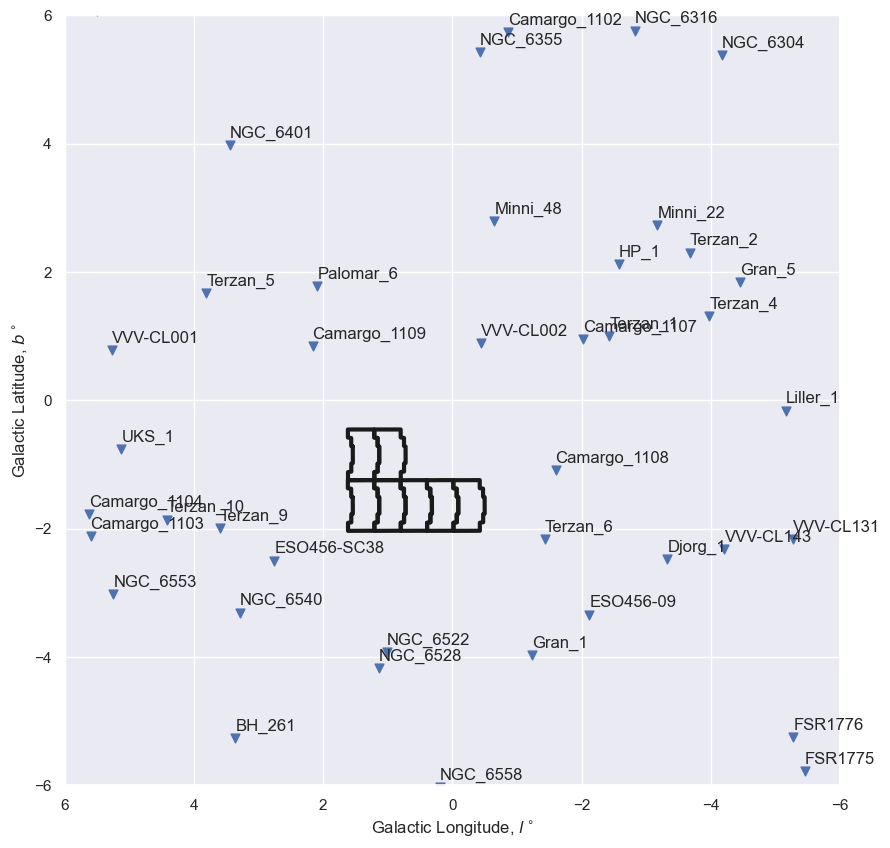

In [230]:
sns.set()
layout='layout_7f_3'
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(1,1,1)

# Field overlay code from M. Penny WFIRST Paper
fields = []
with open('%s.outline.lbad' % (layout)) as fp:
    for k, g in groupby(fp, lambda x: x.startswith(' ')):
        if not k:
            fields.append(np.array([[float(x) for x in d.split()] for d in g if len(d.strip())]))
for f in fields:
        ax.plot(f[:,1],f[:,2],'k-',lw=3)

ax.scatter(gal.l.wrap_at('180d'), gal.b, marker='v', s=40)
ax.set_xlim(6, -6)
ax.set_ylim(-6, 6)
plt.xlabel(r'Galactic Longitude, $l^\circ$')
plt.ylabel(r'Galactic Latitude, $b^\circ$')
# Kludgey annotation method
x = np.array(gal.l.wrap_at('180d'))
y = np.array(gal.b)
z = np.array(ig_clusters.Cluster_Name)
for i in range(len(x)): 
    ax.annotate(z[i], (x[i], y[i]+0.12)) 
plt.show()

#### Bulge Region Overlay: GBTDS 7-field + Galactic Center Design 

### Plotly Visualizations

#### Perform Coodinate Transformation

In [224]:
gal_l_transform = [(q+180)%360 - 180 for q in ig_clusters.Gal_l_deg]

#### Compilation of Globular Clusters in the Inner Galaxy (Zoom-In/Zoom-Out Plotly Go Visualization)

In [236]:
#fig = go.Figure(data=go.Scatter(x=x, y=y, mode='lines'), layout_yaxis_range=[-4,4])
fig = go.FigureWidget([go.Scatter(x=gal_l_transform, y=ig_clusters.Gal_b_deg, mode='markers', hovertext=(ig_clusters['Cluster_Name']))])

scatter = fig.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
fig.layout.hovermode = 'closest'

fig.update_xaxes(title_text = "Galactic longitude, l [°]", range=[6,-6])
fig.update_yaxes(title_text = "Galactic latitude, b [°]", range=[-6,6])
fig.update_layout(title_text='Compilation of Globular Clusters in the Inner Galaxy', title_x=0.25, 
               autosize=False, width=800, height=800)

def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
            
scatter.on_click(update_point)
fig

FigureWidget({
    'data': [{'hovertext': array(['BH_261', 'Camargo_1102', 'Camargo_1103', 'Camargo_1104',
                                  'Camargo_1107', 'Camargo_1108', 'Camargo_1109', 'Djorg_1', 'ESO393-12',
                                  'ESO452-SC11', 'ESO456-09', 'ESO456-SC38', 'FSR0009', 'FSR019',
                                  'FSR025', 'FSR1758', 'FSR1767', 'FSR1775', 'FSR1776', 'Glimpse_C02',
                                  'Gran_1', 'Gran_3', 'Gran_5', 'HP_1', 'Kronberger_49', 'Liller_1',
                                  'Mercer_5', 'Minni_22', 'Minni_48', 'NGC_6256', 'NGC_6266', 'NGC_6304',
                                  'NGC_6316', 'NGC_6325', 'NGC_6342', 'NGC_6355', 'NGC_6401', 'NGC_6440',
                                  'NGC_6522', 'NGC_6528', 'NGC_6539', 'NGC_6540', 'NGC_6553', 'NGC_6558',
                                  'NGC_6624', 'NGC_6626', 'NGC_6637', 'NGC_6638', 'NGC_6642', 'NGC_6652',
                                  'NGC_6717', 'NGC_6723', 'Pa

#### Compilation of Globular Clusters in the Inner Galaxy (Plotly Express Visualization)

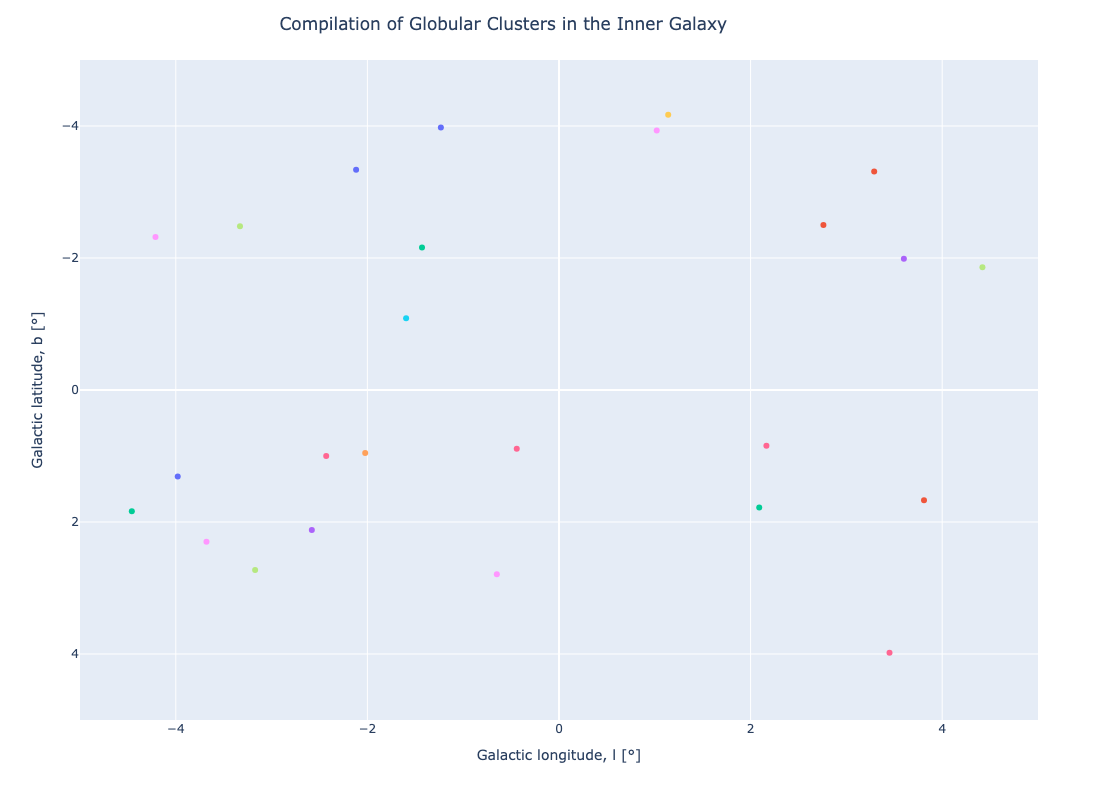

In [232]:
fig = px.scatter(ig_clusters, x=gal_l_transform, y='Gal_b_deg', color='Cluster_Name', 
                 hover_name=ig_clusters.Cluster_Name).update_layout(xaxis_title="Galactic longitude, l [°]",
                                                                    yaxis_title="Galactic latitude, b [°]", showlegend=False)
fig.update_traces(hovertemplate='<br>l</b>: %{x:.2f}'+ '<br>b</b>: %{y:.2f}')
fig.update_yaxes(range=[5, -5])
fig.update_xaxes(range=[-5, 5])
fig.update_layout(title_text='Compilation of Globular Clusters in the Inner Galaxy', title_x=0.25, 
               autosize=False, width=800, height=800)
fig.show()

In [243]:
from IPython.display import IFrame, display
file = "Bica2024_Fig1_MZ-Mod.pdf"
IFrame(file, width=700, height=500)

In [3]:
from wand.image import Image as WImage


ImportError: MagickWand shared library not found.
You probably had not installed ImageMagick library.
Try to install:
  brew install freetype imagemagick